# Clustering

## Business Understanding

Data of a wholesale distributor that supplies gourmet food products to restaurants, cafes, and specialty food retailers

Task: Understand the different client segments to better cater and support each type

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib as pl
from matplotlib.pyplot import *
import seaborn as sb

from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import silhouette_score
from collections import Counter

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN 

## Data understanding

Access to the yearly client report, includes: channel, region, total spent by product categories in the last year 

In [2]:
# Reading data 
df = pd.read_csv('wholesale_clients.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## Data prep

In [3]:
# Removing columns that are not needed 
data = df.drop(columns=['Channel', 'Region'], axis=1)
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [4]:
data.shape

(440, 6)

In [5]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
# Standardizing
scaler = StandardScaler()
scalerfit = scaler.fit_transform(data)
data_scaled = pd.DataFrame(scalerfit, columns=data.columns)
data_scaled

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347
...,...,...,...,...,...,...
435,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091
436,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501
437,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456
438,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046


In [7]:
data_scaled.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [8]:
data.sum()

Fresh               5280131
Milk                2550357
Grocery             3498562
Frozen              1351650
Detergents_Paper    1267857
Delicassen           670943
dtype: int64

<BarContainer object of 6 artists>

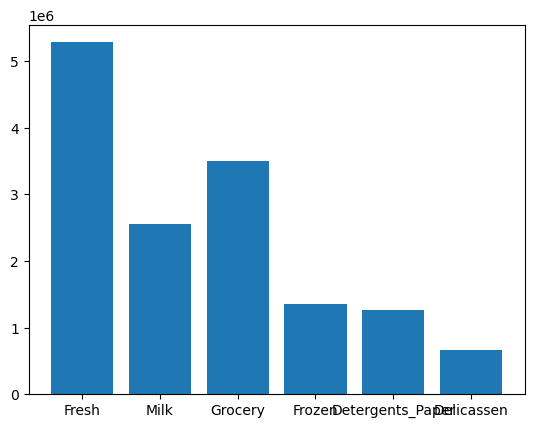

In [9]:
bar(data.sum().index, data.sum().values)

## Modeling

Fit K-Means, DBSCAN, Hierarchical and see which is the best model

### K-Means

#### Fiting the models

In [10]:
ModInertia = []
ModSil=[]

for n in range(2,17):
    
    modelK = KMeans(n_clusters=n, n_init='auto', random_state=42)
    modelK.fit(data_scaled)
    
    ModInertia.append(modelK.inertia_)
    ModSil.append(silhouette_score(data_scaled, modelK.labels_, metric='euclidean', sample_size=None))

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

#### Evaluating best num of clusters

In [11]:
Series_inertia = pd.Series(ModInertia, index=range(2,17))

<Axes: >

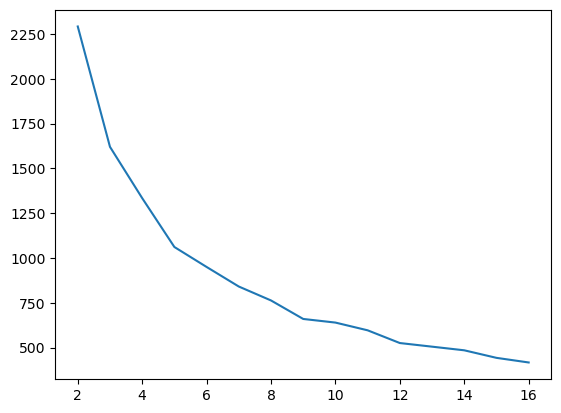

In [12]:
Series_inertia.plot()

In [13]:
# Elbow 3 and 5

Kmeans3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
Kmeans5 = KMeans(n_clusters=5, n_init='auto', random_state=42)

In [14]:
# silhouette analysis

Series_sil = pd.Series(ModSil, range(2,17))

<Axes: >

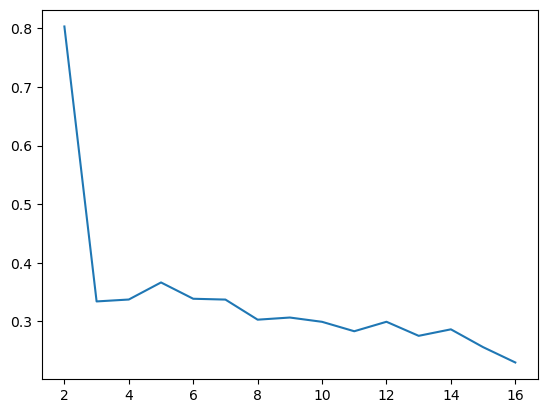

In [15]:
Series_sil.plot()

In [16]:
# Best's silhouette 2 and 5

Kmeans2 = KMeans(n_clusters=2, n_init='auto', random_state=42)

#### Analysing models

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


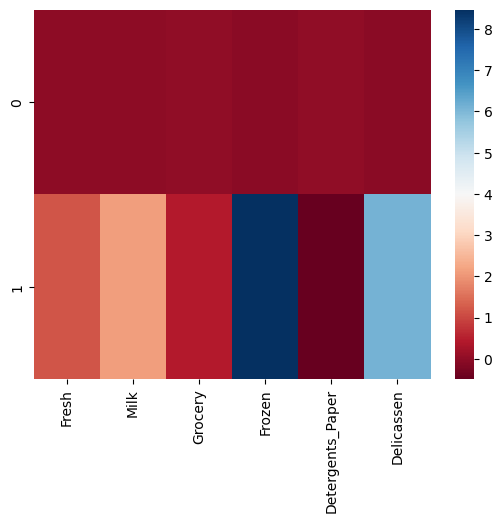

In [17]:
Kmeans2.fit(data_scaled)

centers = Kmeans2.cluster_centers_

cluster_centers2 = pd.DataFrame(centers, columns=data.columns)

sb.heatmap(cluster_centers2, cmap='RdBu');

In [18]:
cluster_centers2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.008129,-0.014414,-0.002894,-0.058137,0.003393,-0.041979
1,1.184129,2.099624,0.421538,8.468571,-0.494319,6.114925


In [19]:
Counter(Kmeans2.labels_)

Counter({0: 437, 1: 3})

Clients 0: **Typical clients**

Clients 1: **Spends much, specialy with frozen anda delicassen**

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


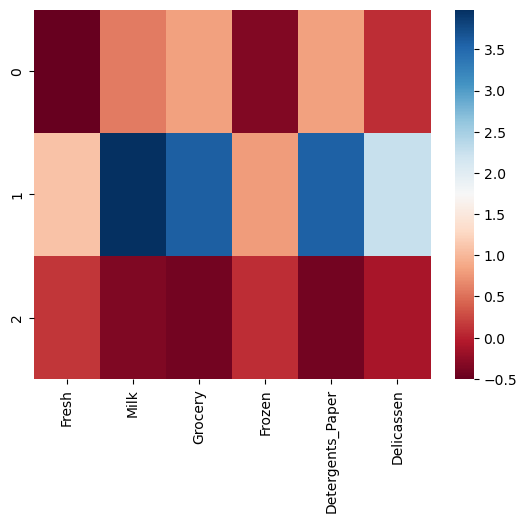

In [20]:
Kmeans3.fit(data_scaled)

centers = Kmeans3.cluster_centers_

cluster_centers3 = pd.DataFrame(centers, columns=data.columns)

sb.heatmap(cluster_centers3, cmap='RdBu');

In [21]:
cluster_centers3

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.503804,0.574921,0.823225,-0.332913,0.816078,0.075524
1,1.090044,3.983203,3.584579,0.777993,3.566641,2.256182
2,0.128126,-0.359900,-0.428714,0.082307,-0.425531,-0.118121


In [22]:
Counter(Kmeans3.labels_)

Counter({2: 318, 0: 109, 1: 13})

Clients 0: **More  milk, grocerys, Detergents_Paper**

Clients 1: **Spends much, specialy milk, grocerys, Detergents_Paper**

Clients 2: **Typical clients**

C:\Users\andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


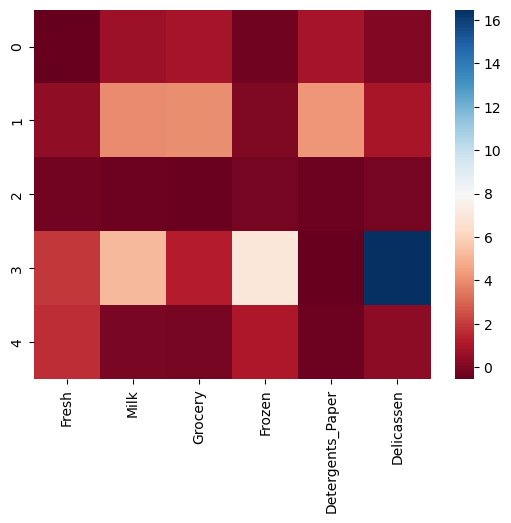

In [23]:
Kmeans5.fit(data_scaled)

centers = Kmeans5.cluster_centers_

cluster_centers5 = pd.DataFrame(centers, columns=data.columns)

sb.heatmap(cluster_centers5, cmap='RdBu');

In [24]:
cluster_centers5

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.513819,0.645602,0.898265,-0.340638,0.906661,0.047542
1,0.388729,3.943049,4.021646,0.035784,4.226116,0.941636
2,-0.228369,-0.385500,-0.438823,-0.163984,-0.399561,-0.194725
3,1.966817,5.175503,1.287217,6.900600,-0.554862,16.478447
4,1.658970,-0.108372,-0.217703,1.103473,-0.404602,0.333025


In [25]:
Counter(Kmeans5.labels_)

Counter({2: 269, 0: 96, 4: 63, 1: 11, 3: 1})

Clients 0: **More  milk, grocerys, Detergents_Paper**

Clients 1: **Spends much, specialy milk, grocerys, Detergents_Paper**

Clients 2: **Typical clients**

Clients 3: **Anomaly that bought a lot of delicassen**

Clients 4: **More fresh and frozen**

### Hierarchical Clustering

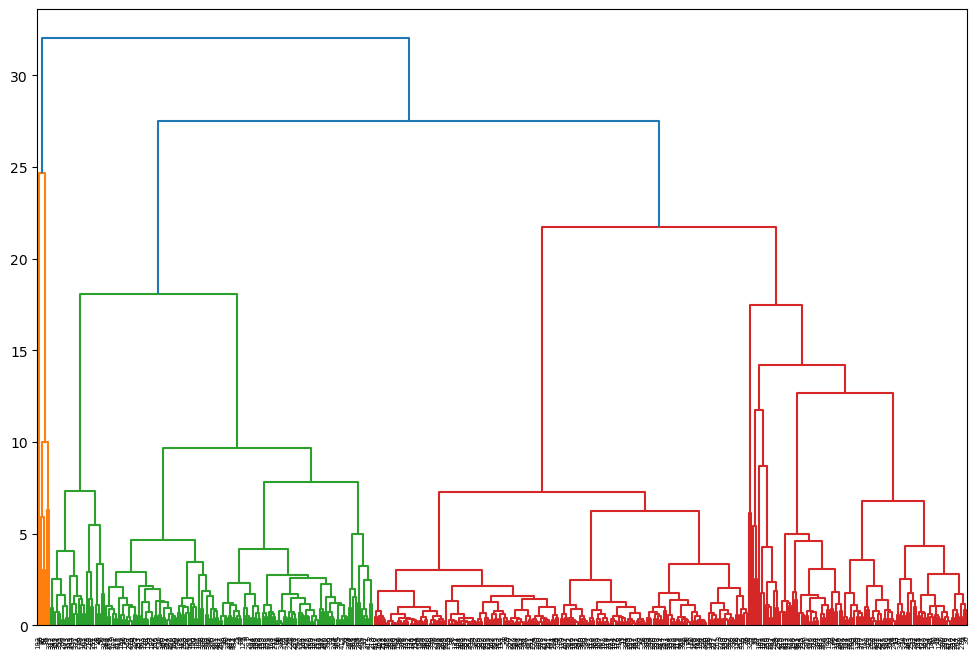

In [26]:
# Dendrogram

link_matrix = linkage(data_scaled, method='ward') 

figure(figsize=(12, 8))

dendrogram_ = dendrogram(link_matrix, color_threshold=25)

In [27]:
# Fiting an agglomerative clustering model seems to be 3 or 5
agg3 = AgglomerativeClustering(3)
agg3.fit(data_scaled)

AgglomerativeClustering(n_clusters=3)

In [28]:
Counter(agg3.labels_)

Counter({1: 281, 2: 153, 0: 6})

In [29]:
agg5 = AgglomerativeClustering(5)
agg5.fit(data_scaled)

AgglomerativeClustering(n_clusters=5)

In [30]:
Counter(agg5.labels_)

Counter({4: 177, 0: 153, 2: 104, 1: 5, 3: 1})

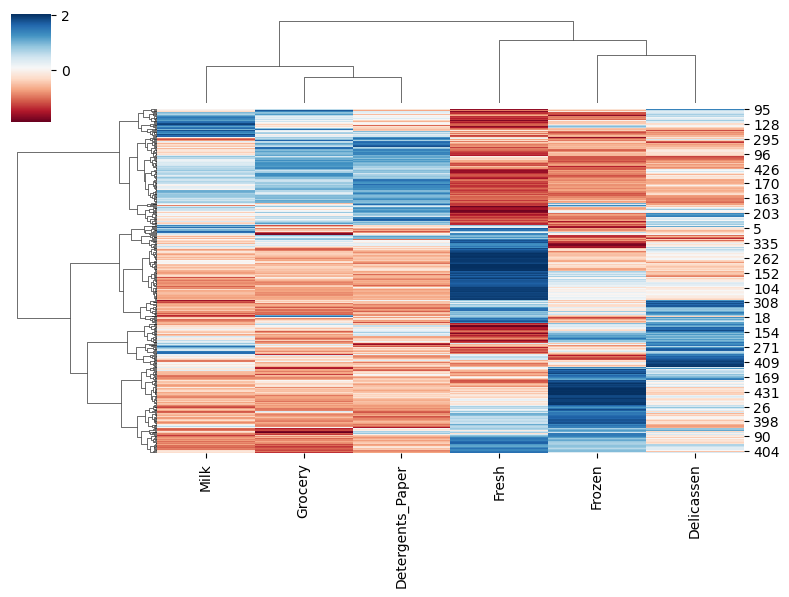

In [31]:
# Cluster map of the model - scaled data by row
sb.clustermap(data_scaled, method='ward', cmap='RdBu', figsize=(8, 6), xticklabels=data.columns, z_score=0)
show()

In [32]:
# silhouette
mod_agg_sil = []

for n in range(2,21):
    aggn = AgglomerativeClustering(n)
    aggn.fit(data_scaled)
    mod_agg_sil.append(silhouette_score(data_scaled, aggn.labels_, metric='euclidean', sample_size=None))

In [33]:
pd.Series(mod_agg_sil, index=range(2,21))

2     0.792457
3     0.264609
4     0.267015
5     0.239884
6     0.234250
7     0.244057
8     0.252038
9     0.272026
10    0.279543
11    0.280154
12    0.245624
13    0.246477
14    0.229030
15    0.230841
16    0.188967
17    0.195995
18    0.195495
19    0.202193
20    0.201606
dtype: float64

In [34]:
# Observations: The best silhouette is the 2. And between 3 and 5, 3 has the best score
agg2 = AgglomerativeClustering(2)
agg2.fit(data_scaled)
Counter(agg2.labels_)

Counter({0: 434, 1: 6})

### DBSCAN

In [35]:
# Function for tuning

def tune_dbscan(data):

    results = []

    # defining the range of eps and min_samples values to loop through
    eps_values = np.arange(.1, 5, .1)
    min_samples_values = np.arange(2, 10, 1)

    # looping through the combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(data)
            labels = dbscan.labels_

            # counting the number of clusters (excluding noise points labeled as -1)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

            # counting the number of noise points (labeled as -1)
            n_noise = list(labels).count(-1)

            # calculate the silhouette score (excluding noise points)
            if n_clusters > 1:  # silhouette score requires at least 2 clusters
                silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
            else:
                silhouette = None

            results.append([eps, min_samples, n_clusters, n_noise, silhouette])

    # puting the results in a dataframe
    dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                    "Number of Noise Points", "Silhouette Score"])
    return dbscan_results

In [36]:
df_db = tune_dbscan(data_scaled).sort_values('Silhouette Score', ascending=False)

In [37]:
df_db.sort_values('Silhouette Score',ascending=False).groupby('Silhouette Score').head(1).head(10)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
272,3.5,2,2,8,0.740284
224,2.9,2,2,10,0.582247
136,1.8,2,2,13,0.581583
122,1.6,4,2,24,0.578543
232,3.0,2,3,8,0.577890
96,1.3,2,3,25,0.424572
105,1.4,3,3,23,0.423547
113,1.5,3,3,21,0.421271
89,1.2,3,2,32,0.419507
81,1.1,3,2,40,0.417466


Best model in term of silhouette:

eps = **3.5**, Min samples = **2**

In [38]:
# applying the model to the top silhouette
dbscan = DBSCAN(eps=3.5, min_samples=2)
dbscan.fit(data_scaled)

DBSCAN(eps=3.5, min_samples=2)

In [39]:
Counter(dbscan.labels_)

Counter({0: 430, -1: 8, 1: 2})

## Evaluation

### Comparing Techniques

1. K-Means with 3 clusters
2. K-Means with 5 clusters
3. Hiearchical Clustering with 2 clusters
4. Hierarchical Clustering with 3 clusters
5. DBSCAN with 2 clusters

**Kmeans 3**

In [40]:
model_k3 = pd.Series(Kmeans3.labels_, name='model_k3')
model_k3

0      2
1      0
2      0
3      2
4      2
      ..
435    2
436    2
437    0
438    2
439    2
Name: model_k3, Length: 440, dtype: int32

In [41]:
model_k3 = model_k3.map({0:'More  milk, grocerys, Detergents_Paper',
                         1:'Spends much, specialy milk, grocerys, Detergents_Paper',
                         2:'Typical clients'})
model_k3.value_counts()

model_k3
Typical clients                                           318
More  milk, grocerys, Detergents_Paper                    109
Spends much, specialy milk, grocerys, Detergents_Paper     13
Name: count, dtype: int64

In [42]:
silhouette_score(data_scaled, Kmeans3.labels_, metric='euclidean', sample_size=None)

0.33391714199926514

**Kmeans 5**

In [43]:
model_k5 = pd.Series(Kmeans5.labels_, name='model_k5')
model_k5

0      2
1      0
2      0
3      2
4      4
      ..
435    4
436    4
437    0
438    2
439    2
Name: model_k5, Length: 440, dtype: int32

In [44]:
model_k5 = model_k5.map({0:'More  milk, grocerys, Detergents_Paper',
                      1:'Spends much, specialy milk, grocerys, Detergents_Paper',
                      2:'Typical clients',
                      3:'Anomaly that bought a lot of delicassen',
                      4:'More fresh and frozen'})
model_k5.value_counts()

model_k5
Typical clients                                           269
More  milk, grocerys, Detergents_Paper                     96
More fresh and frozen                                      63
Spends much, specialy milk, grocerys, Detergents_Paper     11
Anomaly that bought a lot of delicassen                     1
Name: count, dtype: int64

In [45]:
silhouette_score(data_scaled, Kmeans5.labels_, metric='euclidean', sample_size=None)

0.3663027726916198

**Hierarchical 2**

In [46]:
Counter(agg2.labels_)

Counter({0: 434, 1: 6})

In [47]:
model_hie2 = pd.Series(agg2.labels_, name='model_hie2')
model_hie2

0      0
1      0
2      0
3      0
4      0
      ..
435    0
436    0
437    0
438    0
439    0
Name: model_hie2, Length: 440, dtype: int64

In [48]:
silhouette_score(data_scaled, agg2.labels_, metric='euclidean', sample_size=None)

0.7924572758342273

**Hierarchical 3**

In [49]:
Counter(agg3.labels_)

Counter({1: 281, 2: 153, 0: 6})

In [50]:
model_hie3 = pd.Series(agg3.labels_, name='model_hie3')
model_hie3

0      2
1      2
2      2
3      1
4      1
      ..
435    1
436    1
437    2
438    1
439    1
Name: model_hie3, Length: 440, dtype: int64

In [51]:
silhouette_score(data_scaled, agg3.labels_, metric='euclidean', sample_size=None)

0.2646091480214908

**DBSCAN**

In [52]:
Counter(dbscan.labels_)

Counter({0: 430, -1: 8, 1: 2})

In [53]:
model_db = pd.Series(dbscan.labels_, name='model_db')
model_db

0      0
1      0
2      0
3      0
4      0
      ..
435    0
436    0
437    0
438    0
439    0
Name: model_db, Length: 440, dtype: int64

In [54]:
silhouette_score(data_scaled, dbscan.labels_, metric='euclidean', sample_size=None)

0.740283564230615

### Analysing

In [55]:
(df_models.groupby([model_k3, model_k5])
     [['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].mean())

NameError: name 'df_models' is not defined

In [ ]:
(df_models.groupby([model_k3, model_hie3])
     [['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].count())

In [ ]:
(df_models.groupby([model_hie3, model_k5])
     [['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum())

- Models with 2 cluster have good silhouette score but doesn't separe in good clusters, they indicade more the anomalies
    - DBSCAN
    - Hierarchical 2
- The models with 3 and 5 cluster have a good clusterisation, and the best's silhouettes scores kmeans5 > kmeans3 > hier3
- So considering all, the **Kmeans 3** has the best clusterization with still a good silhouette score

### Conclusion

The clients will be segmented into 3 different groups to be better catered and supported. 

The groups:
1. Typical clients, a little bit of everything - cluster(2)
2. Clients that buy more milk, grocerys and paper items - cluster(0)
3. Small group of clients, but they buy a lot, specially milk, grocerys, paper items - cluster(1)

### Predicting the cluster of a new client

In [ ]:
creating_new_client = pd.DataFrame([np.array([15000, 15000, 30000, 500, 15000, 2000])],
                          columns=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
creating_new_client

In [ ]:
# Scaling the new client
new_scaled = scaler.transform(creating_new_client)
df_new_scaled = pd.DataFrame(data=new_scaled, columns=data.columns)
df_new_scaled

In [ ]:
Kmeans3.predict(df_new_scaled)